<a href="https://colab.research.google.com/github/Piyush-004/Research-Paper-Recommendation-System/blob/main/ResearchPaperRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval
# is used for safely evaluating strings containing Python literals or container displays
# (e.g., lists, dictionaries) to their corresponding Python objects.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
arxiv_data = pd.read_csv("arxiv_data_210930-054931.csv")

# Recommender System

In [ ]:
arxiv_data.drop(columns = ["terms","abstracts"], inplace = True)

In [ ]:
arxiv_data.drop_duplicates(inplace= True)
arxiv_data.reset_index(drop= True,inplace = True)

In [ ]:
pd.set_option('display.max_colwidth', None)
arxiv_data

,titles,terms_str
0,Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities,['cs.LG']
1,Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes,"['cs.LG', 'cs.AI']"
2,Power up! Robust Graph Convolutional Network via Graph Powering,"['cs.LG', 'cs.CR', 'stat.ML']"
3,Releasing Graph Neural Networks with Differential Privacy Guarantees,"['cs.LG', 'cs.CR']"
4,Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification,['cs.LG']
...,...,...
41100,An experimental study of graph-based semi-supervised classification with additional node information,['stat.ML']
41101,Bayesian Differential Privacy through Posterior Sampling,"['stat.ML', 'cs.LG']"
41102,Mining Spatio-temporal Data on Industrialization from Historical Registries,"['cs.CV', 'cs.IR']"
41103,Wav2Letter: an End-to-End ConvNet-based Speech Recognition System,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']"


In [ ]:
!pip install -U -q sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.1 MB/s eta 0:00:00


In [ ]:
# This imports the SentenceTransformer class from the Sentence Transformers library.
from sentence_transformers import SentenceTransformer, util
# we load all-MiniLM-L6-v2, which is a MiniLM model fine tuned on a large dataset of over
# 1 billion training pairs.
#This initializes the 'all-MiniLM-L6-v2' model from Sentence Transformers.
# This model is capable of encoding sentences into fixed-size vectors (embeddings).
model = SentenceTransformer('all-MiniLM-L6-v2')
#Our sentences we like to encode
sentences = arxiv_data['titles']
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

"""
The embeddings can be used for various natural language processing (NLP) tasks,
such as similarity search, clustering
"""

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

'\nThe embeddings can be used for various natural language processing (NLP) tasks,\nsuch as similarity search, clustering\n'

In [ ]:
embeddings

array([[ 0.06643405, -0.04954598,  0.06388085, ...,  0.00106302,
        -0.12156379, -0.06962775],
       [ 0.09212255, -0.07606938,  0.06572867, ..., -0.08565167,
        -0.09266547,  0.00725293],
       [-0.08162681,  0.02428931,  0.01888746, ...,  0.0080616 ,
        -0.0512953 , -0.05873995],
       ...,
       [ 0.01227978, -0.08568833, -0.02782771, ..., -0.05257976,
        -0.10806683,  0.07843316],
       [-0.07258201, -0.12690923, -0.00535554, ...,  0.03597707,
        -0.03986147, -0.05971023],
       [ 0.00768871, -0.10124183,  0.08909854, ..., -0.08199863,
        -0.05649742,  0.09007058]], dtype=float32)

In [ ]:
c = 0
#This loop iterates over pairs of sentences and their corresponding embeddings.
#zip is used to iterate over both lists simultaneously.
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding length:", len(embedding)) # list of floats
    print("")
    # Breaks out of the loop after printing information for the first 5 sentences.
    if c >=5:
        break
    c +=1

Sentence: Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
Embedding length: 384

Sentence: Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
Embedding length: 384

Sentence: Power up! Robust Graph Convolutional Network via Graph Powering
Embedding length: 384

Sentence: Releasing Graph Neural Networks with Differential Privacy Guarantees
Embedding length: 384

Sentence: Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
Embedding length: 384

Sentence: Lifelong Graph Learning
Embedding length: 384



In [ ]:
import pickle
# Saving sentences and corresponding embeddings
with open('embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

with open('sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

with open('rec_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# load save files
embeddings = pickle.load(open('embeddings.pkl','rb'))
sentences = pickle.load(open('sentences.pkl','rb'))
rec_model = pickle.load(open('rec_model.pkl','rb'))

In [ ]:
import torch

def recommendation(input_paper):
    # Calculate cosine similarity scores between the embeddings of input_paper and all papers in the dataset.
    cosine_scores = util.cos_sim(embeddings, rec_model.encode(input_paper))

    # Get the indices of the top-k most similar papers based on cosine similarity.
    top_similar_papers = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

    # Retrieve the titles of the top similar papers.
    papers_list = []
    for i in top_similar_papers.indices:
        papers_list.append(sentences[i.item()])

    return papers_list

In [ ]:
# example usage 1: (use this paper as input (Attention is All you Need))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likeCOMPUTER VISION
We recommend to read this paper............
Computer Stereo Vision for Autonomous Driving
Learning Inference Models for Computer Vision
Towards General Purpose Vision Systems
Learning Robust Representations for Computer Vision
Probabilistic and Geometric Depth: Detecting Objects in Perspective


In [ ]:
# exampel usage 2: (use this paper as input (BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likeBERT
We recommend to read this paper............
Visualizing and Measuring the Geometry of BERT
On the Stability of Fine-tuning BERT: Misconceptions, Explanations, and Strong Baselines
The Lottery Ticket Hypothesis for Pre-trained BERT Networks
Telling BERT's full story: from Local Attention to Global Aggregation
VD-BERT: A Unified Vision and Dialog Transformer with BERT


In [ ]:
# exampel usage 3: (use this paper as input (Review of deep learning: concepts, CNN architectures, challenges, applications, future directions))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likeCNN
We recommend to read this paper............
Fast R-CNN
CNN-generated images are surprisingly easy to spot... for now
Mask R-CNN
Grid R-CNN
R-CNN minus R


In [ ]:
# install this versions
import sentence_transformers
import tensorflow
import torch
print(torch.__version__)
print(sentence_transformers.__version__)
print(tensorflow.__version__)

#Subject Area Prediction Function

In [ ]:
from ast import literal_eval


# Convert 'terms' column from string representation of list to actual list
arxiv_data['terms'] = arxiv_data['terms'].apply(literal_eval)

# Remove duplicate entries based on the 'titles' column
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]

# Convert 'terms' column to string for grouping
arxiv_data['terms_str'] = arxiv_data['terms'].apply(str)

# Filter rare terms (keep terms that appear more than once)
arxiv_data_filtered = arxiv_data.groupby('terms_str').filter(lambda x: len(x) > 1)

# Convert 'terms' column back to list format
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms_str'].apply(literal_eval)
arxiv_data_filtered.drop(columns=['terms_str'], inplace=True)

# Stratified train-test split
train_df, test_df = train_test_split(arxiv_data_filtered, test_size=0.1, stratify=arxiv_data_filtered["terms"].values)

# Further split the test set into validation and test sets
val_df = test_df.sample(frac=0.5, random_state=42)
test_df = test_df.drop(val_df.index)

# Consistent preprocessing for label binarization
terms = tf.ragged.constant(train_df['terms'].values)
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
lookup.adapt(terms)
vocab = lookup.get_vocabulary()

# Verify the vocabulary size
vocabulary_size = len(vocab)
print(f"Vocabulary size: {vocabulary_size}")

# Binarize a sample label
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")
label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

# Define a function to create datasets
def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["terms"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    dataset = dataset.shuffle(1280) if is_train else dataset
    return dataset.batch(128)

# Create datasets
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

# Function to invert multi-hot encoding to a list of strings
def invert_multi_hot(encoded_labels):
    """Reverse a multi-hot encoding to a list of strings."""
    decoded_labels = []
    for index in np.where(encoded_labels == 1)[0]:
        decoded_labels.append(vocab[index])
    return decoded_labels

# Display sample abstracts and labels
text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

# Create vocabulary with unique words from abstracts
vocabulary = set()
arxiv_data["abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(f"Abstract vocabulary size: {vocabulary_size}")

# Ensure vocabulary size is exactly 158812 if needed
if vocabulary_size < 158812:
    for i in range(158812 - vocabulary_size):
        vocabulary.add(f"dummyword{i}")
elif vocabulary_size > 158812:
    vocabulary = list(vocabulary)[:158812]

vocabulary_size = len(vocabulary)
print(f"Adjusted vocabulary size: {vocabulary_size}")


<ipython-input-3-eac364ccd81d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arxiv_data['terms_str'] = arxiv_data['terms'].apply(str)


Vocabulary size: 165
Original label: ['cs.LG']
Label-binarized representation: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Abstract: b'It is essential for an automated vehicle in the field to perform\ndiscretionary lane changes with appropriate roadmanship - driving safely and\nefficiently without annoying or endangering other road users - under a wide\nrange of traffic cultures and driving conditions. While deep reinforcement\nlearning methods have excelled in recent years and been applied to automated\nvehicle driving policy,

In [ ]:
# Initializes a TextVectorization layer
text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size,ngrams=2,output_mode="tf_idf")
# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)


In [ ]:
# creating shallow_mlp_model  (MLP)
from tensorflow.keras.callbacks import EarlyStopping

# Creating shallow_mlp_model (MLP) with dropout layers
model1 = keras.Sequential([
    # First hidden layer: 512 neurons, ReLU activation function, with dropout.
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Second hidden layer: 256 neurons, ReLU activation function, with dropout.
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Output layer: The number of neurons equals the vocabulary size (output vocabulary of the StringLookup layer), with a sigmoid activation function.
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

# Compile the model
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

# Add early stopping
# Number of epochs with no improvement after which training will be stopped.
# Restore weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)

# Train the model
# Add early stopping callback.verbose=1
history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=20,callbacks=[early_stopping])

Epoch 1/20
272/272 [==============================] - 652s 2s/step - loss: 0.0470 - binary_accuracy: 0.9840 - val_loss: 0.0176 - val_binary_accuracy: 0.9948
Epoch 2/20
272/272 [==============================] - 660s 2s/step - loss: 0.0170 - binary_accuracy: 0.9951 - val_loss: 0.0174 - val_binary_accuracy: 0.9950
Epoch 3/20
272/272 [==============================] - 665s 2s/step - loss: 0.0131 - binary_accuracy: 0.9961 - val_loss: 0.0181 - val_binary_accuracy: 0.9949
Epoch 4/20
272/272 [==============================] - 675s 2s/step - loss: 0.0108 - binary_accuracy: 0.9968 - val_loss: 0.0188 - val_binary_accuracy: 0.9948
Epoch 5/20
272/272 [==============================] - 659s 2s/step - loss: 0.0093 - binary_accuracy: 0.9972 - val_loss: 0.0191 - val_binary_accuracy: 0.9947
Epoch 6/20
272/272 [==============================] - 654s 2s/step - loss: 0.0083 - binary_accuracy: 0.9976 - val_loss: 0.0198 - val_binary_accuracy: 0.9949
Epoch 7/20
272/272 [==============================] - 657s

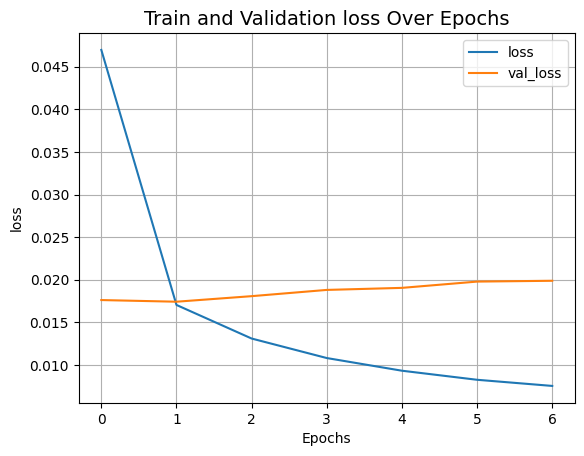

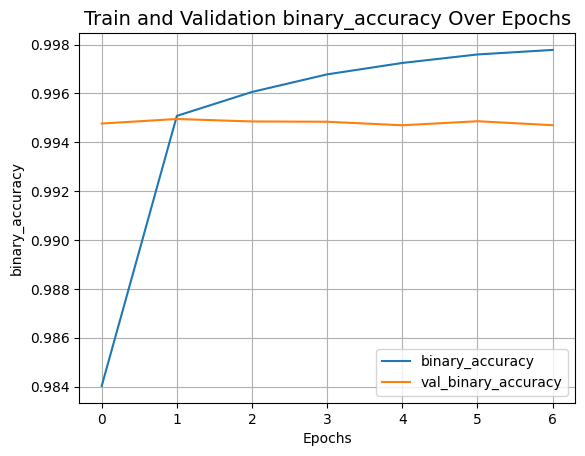

In [ ]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

In [ ]:
# model evaltuation on test and val dataset
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 [==============================] - 8s 474ms/step - loss: 0.0174 - binary_accuracy: 0.9950
Categorical accuracy on the test set: 99.45%.
Categorical accuracy on the validation set: 99.5%.


In [ ]:
import pickle
# Save the model
model1.save("models/model.h5")

# Save the configuration of the text vectorizer
saved_text_vectorizer_config = text_vectorizer.get_config()
with open("models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)


# Save the vocabulary
with open("models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

In [ ]:
from tensorflow import keras
import pickle

# Load the model
loaded_model = keras.models.load_model("models/model.h5")

from tensorflow.keras.layers import TextVectorization

# Load the configuration of the text vectorizer
with open("models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)

# Create a new TextVectorization layer with the saved configuration
loaded_text_vectorizer = TextVectorization.from_config(saved_text_vectorizer_config)

# Load the saved weights into the new TextVectorization layer
with open("text_vectorizer_weights.pkl", "rb") as f:
    weights = pickle.load(f)
    loaded_text_vectorizer.set_weights(weights)

In [ ]:
# Load the vocabulary
with open("models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)

In [ ]:
def predict_category(abstract, model, vectorizer, label_lookup):
    # Preprocess the abstract using the loaded text vectorizer
    preprocessed_abstract = vectorizer([abstract])

    # Make predictions using the loaded model
    predictions = model.predict(preprocessed_abstract)

    # Convert predictions to human-readable labels
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])

    return predicted_labels

In [ ]:
# Example usage
new_abstract = "Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 [==============================] - 0s 207ms/step
Predicted Categories: ['cs.CV']


In [ ]:
# Example usage
new_abstract = 'Deep networks and decision forests (such as random forests and gradient\nboosted trees) are the leading machine learning methods for structured and\ntabular data, respectively. Many papers have empirically compared large numbers\nof classifiers on one or two different domains (e.g., on 100 different tabular\ndata settings). However, a careful conceptual and empirical comparison of these\ntwo strategies using the most contemporary best practices has yet to be\nperformed. Conceptually, we illustrate that both can be profitably viewed as\n"partition and vote" schemes. Specifically, the representation space that they\nboth learn is a partitioning of feature space into a union of convex polytopes.\nFor inference, each decides on the basis of votes from the activated nodes.\nThis formulation allows for a unified basic understanding of the relationship\nbetween these methods. Empirically, we compare these two strategies on hundreds\nof tabular data settings, as well as several vision and auditory settings. Our\nfocus is on datasets with at most 10,000 samples, which represent a large\nfraction of scientific and biomedical datasets. In general, we found forests to\nexcel at tabular and structured data (vision and audition) with small sample\nsizes, whereas deep nets performed better on structured data with larger sample\nsizes. This suggests that further gains in both scenarios may be realized via\nfurther combining aspects of forests and networks. We will continue revising\nthis technical report in the coming months with updated results.'
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 [==============================] - 0s 80ms/step
Predicted Categories: ['cs.CV']


In [ ]:
# Example usage
new_abstract = 'ML'
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 [==============================] - 0s 72ms/step
Predicted Categories: ['cs.LG', 'stat.ML']
